In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

dataset= pd.read_csv(r'C:\Users\thesh\OneDrive\Máy tính\AI\data\iphone_purchase_records.csv')
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [51]:
labelEncoder_gender =  LabelEncoder()
X[:,0] = labelEncoder_gender.fit_transform(X[:,0])
X = np.vstack(X[:, :]).astype(np.float)

C:\Users\thesh\AppData\Local\Temp\ipykernel_9820\3973557093.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X = np.vstack(X[:, :]).astype(np.float)


In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [53]:
sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [54]:
classifier = DecisionTreeClassifier(criterion='entropy',random_state = 0)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [55]:
y_pred = classifier.predict(X_test)

In [56]:
print(y_pred)
print(y_test)

[0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0
 0 0 0 0 1 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 1 1 1]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1]


<AxesSubplot:>

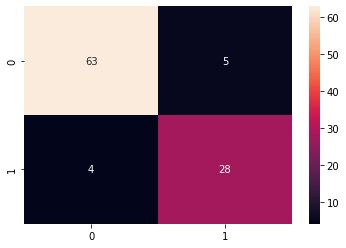

In [57]:
cm = metrics.confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d')